In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [2]:
!pip install -U statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 52.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.2
    Uninstalling statsmodels-0.14.2:
      Successfully uninstalled statsmodels-0.14.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.9.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.0 which is incompatible.


In [3]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2024-09-25 10:19:12--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-09-25 10:19:12 ERROR 403: Forbidden.



In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [12]:
df = pd.read_csv("/kaggle/input/lazyprogrammerdataset/perrin-freres-monthly-champagne.csv",index_col = 'Month', parse_dates = True,skipfooter = 2)

/tmp/ipykernel_36/577723368.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/kaggle/input/lazyprogrammerdataset/perrin-freres-monthly-champagne.csv",index_col = 'Month', parse_dates = True,skipfooter = 2)


In [13]:
df

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [14]:
df.columns = ['Sales']

<Axes: xlabel='Month'>

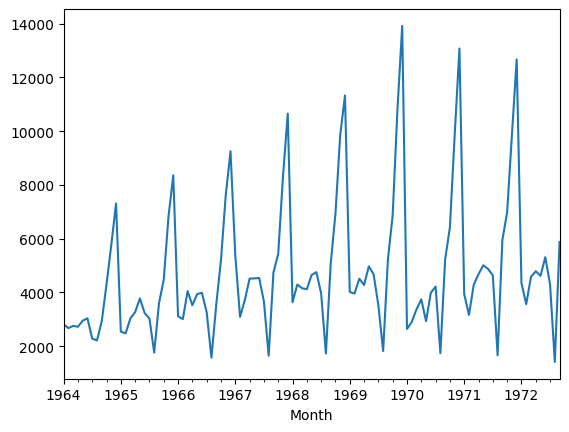

In [15]:
df['Sales'].plot()

In [16]:
df.index.freq = 'MS'

In [19]:
Ntest=12 
train = df[:-Ntest]
test = df[-Ntest:]

In [21]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [58]:
hw = ExponentialSmoothing(train['Sales'],
                         initialization_method = 'legacy-heuristic',
                         seasonal = 'mul',
                          trend = 'add',
                          seasonal_periods = 12
                         )

In [59]:
res_hw = hw.fit()

In [60]:
df.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues

In [61]:
df.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest)

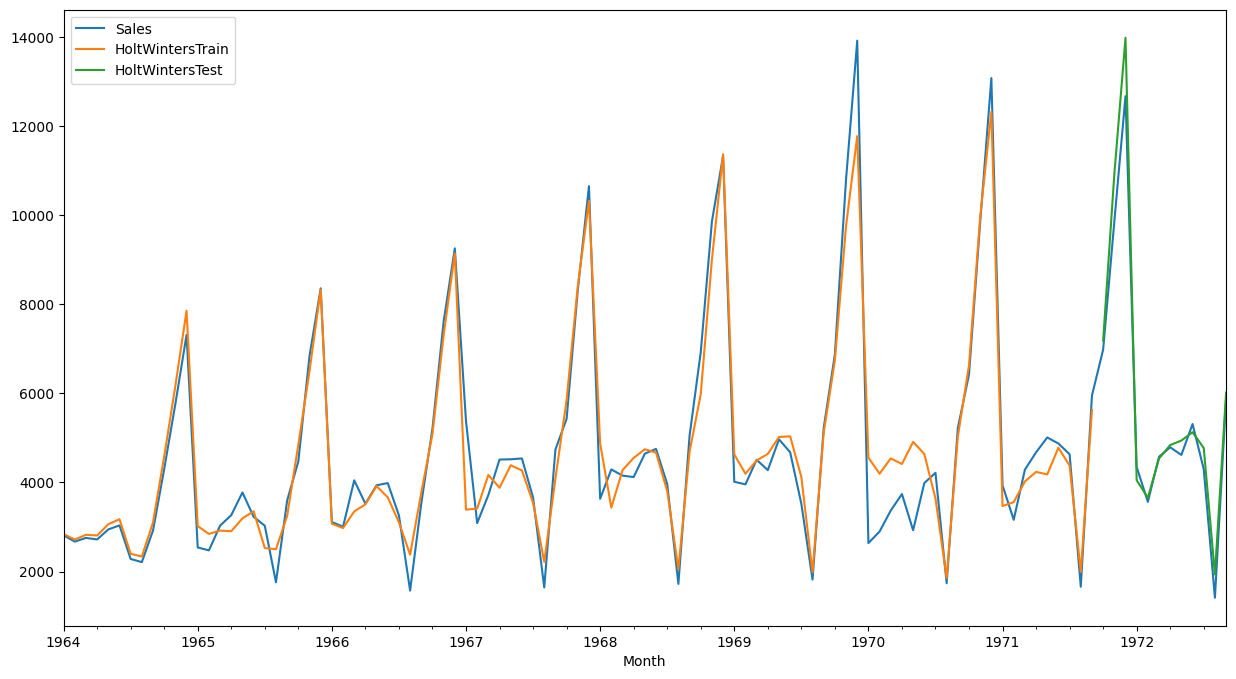

In [62]:
df[['Sales','HoltWintersTrain','HoltWintersTest']].plot(figsize =(15,8));

In [63]:
r2_score(train['Sales'],res_hw.fittedvalues)

0.9379539220054911

In [64]:
r2_score(test['Sales'],res_hw.forecast(Ntest))

0.962607389903651